<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/II_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dimensionality Reduction in Machine Learning**

### **Import Libraries**

In [37]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Method
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier


# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load the data**

In [38]:
data = pd.read_csv("Diabetes Multi-Class.csv", sep=';', on_bad_lines='skip')

In [39]:
data.head()

,Patient,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [40]:
data.shape

(10000, 23)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient               10000 non-null  int64  
 1   Diabetes_012          10000 non-null  float64
 2   HighBP                10000 non-null  float64
 3   HighChol              10000 non-null  float64
 4   CholCheck             10000 non-null  float64
 5   BMI                   10000 non-null  float64
 6   Smoker                10000 non-null  float64
 7   Stroke                10000 non-null  float64
 8   HeartDiseaseorAttack  10000 non-null  float64
 9   PhysActivity          10000 non-null  float64
 10  Fruits                10000 non-null  float64
 11  Veggies               10000 non-null  float64
 12  HvyAlcoholConsump     10000 non-null  float64
 13  AnyHealthcare         10000 non-null  float64
 14  NoDocbcCost           10000 non-null  float64
 15  GenHlth             

**Drop null from target var, and Convert data to Float**

In [42]:
data = data.drop(["Patient"], axis=1)
data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          10000 non-null  float64
 1   HighBP                10000 non-null  float64
 2   HighChol              10000 non-null  float64
 3   CholCheck             10000 non-null  float64
 4   BMI                   10000 non-null  float64
 5   Smoker                10000 non-null  float64
 6   Stroke                10000 non-null  float64
 7   HeartDiseaseorAttack  10000 non-null  float64
 8   PhysActivity          10000 non-null  float64
 9   Fruits                10000 non-null  float64
 10  Veggies               10000 non-null  float64
 11  HvyAlcoholConsump     10000 non-null  float64
 12  AnyHealthcare         10000 non-null  float64
 13  NoDocbcCost           10000 non-null  float64
 14  GenHlth               10000 non-null  float64
 15  MentHlth            

### **Class Distribution**

**Explore the class distribution**

In [43]:
class_counts = data['Diabetes_012'].value_counts()
print(class_counts)

0.0    8216
2.0    1606
1.0     178
Name: Diabetes_012, dtype: int64


**Visualize the class distribution**

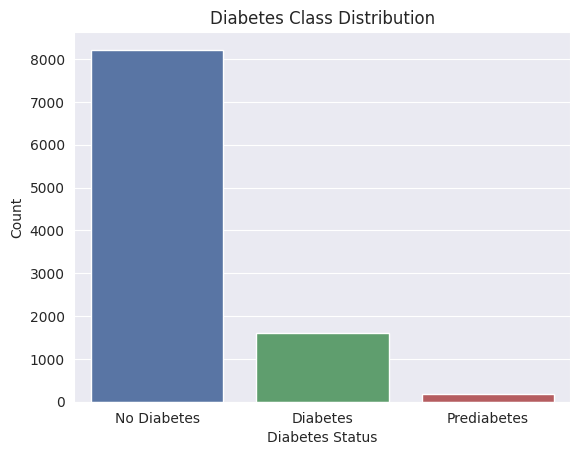

In [44]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0.0: 'No Diabetes', 1.0: 'Prediabetes', 2.0: 'Diabetes'}
new_data['dhi_label'] = new_data['Diabetes_012'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='dhi_label')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution')
plt.show()

### **Standardizing**

In [45]:
data_x = data.drop(["Diabetes_012"], axis=1)
data_y = data['Diabetes_012']

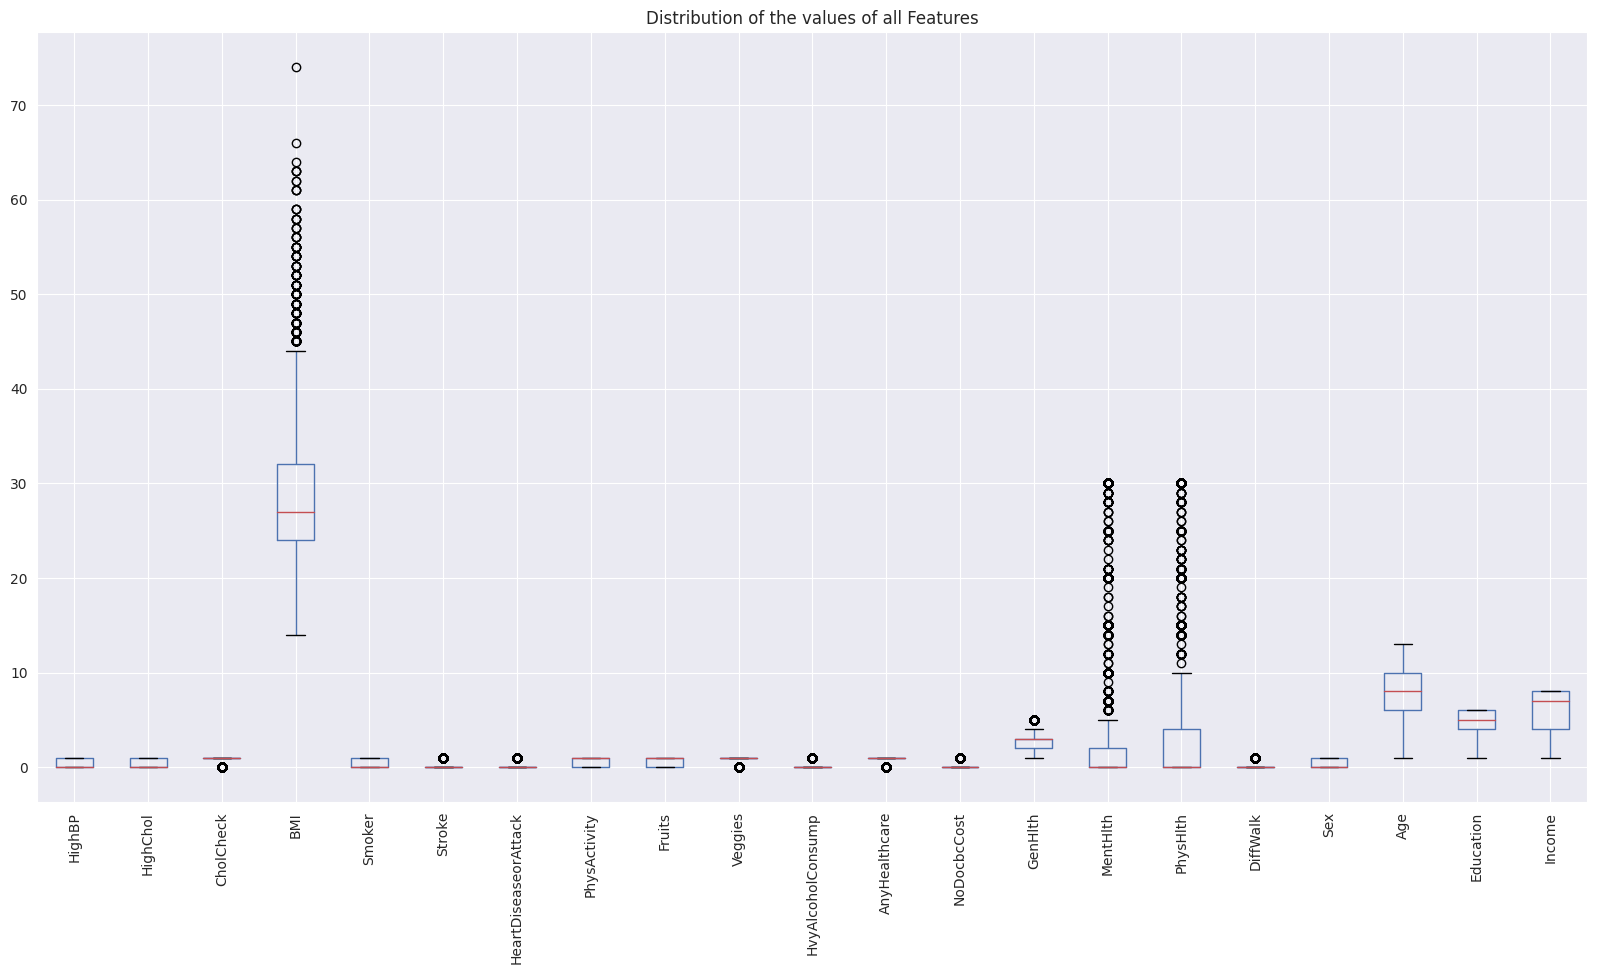

In [46]:
plt.figure(figsize=(20,10))
data_x.boxplot()
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all Features")
plt.show()

- *We observe a large Scale difference between variables. We need to standardize them to avoid those with large scales wrongly have too much weight in the calculations.*

- *Standardizing a dataset is necessary in several situations to ensure fair and meaningful comparisons and analyses*


- *PCA aims to capture the most variance in the data. If features are on different scales, those with larger scales will contribute more to the variance, potentially overshadowing important patterns present in smaller-scaled features.*

- *Standardization can indeed be beneficial in this situation. Applying a StandardScaler is a common preprocessing step before using dimensionality reduction techniques.*

1. **Standardization Purpose:**

  *Standardization (or z-score normalization) transforms the features in a way that they have a mean of 0 and a standard deviation of 1. This process helps when features are on different scales, as some dimensionality reduction techniques, like PCA, are sensitive to the scale of the data.*

2. **Application of StandardScaler:**

  *It's generally a good practice to apply the StandardScaler to all features in your dataset, especially if there are large scale differences between them. This ensures that all features are on a similar scale, which can prevent certain features from dominating the dimensionality reduction process simply due to their larger values.*

*Applying the StandardScaler to all features in your diabetes dataset is a wise choice. This will help ensure that your dimensionality reduction techniques and ensemble methods perform consistently and effectively across all features, regardless of their scale differences.*



**Standardize the feature columns**

In [47]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data_x)

# Convert the standardized features back to a DataFrame
std_data = pd.DataFrame(standardized_features, columns=data_x.columns)

In [48]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.078036,1.106883,0.200913,1.804549,1.102643,-0.221828,-0.335182,-1.701646,-1.235011,0.494682,...,0.253317,-0.346514,2.174080,1.844705,1.113405,2.027924,-0.846952,0.295347,-1.012157,-1.372912
1,-0.927613,-0.903438,-4.977268,-0.564994,1.102643,-0.221828,-0.335182,0.587666,-1.235011,-2.021502,...,-3.947626,2.885890,0.362875,-0.450228,-0.519345,-0.493115,-0.846952,-0.372028,0.999484,-2.313455
2,1.078036,1.106883,0.200913,-0.091085,-0.906912,-0.221828,-0.335182,-1.701646,0.809709,-2.021502,...,0.253317,2.885890,2.174080,3.374660,2.746156,2.027924,-0.846952,0.295347,-1.012157,0.978448
3,1.078036,-0.903438,0.200913,-0.249055,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,0.253317,-0.346514,-0.542728,-0.450228,-0.519345,-0.493115,-0.846952,0.962722,-2.017977,0.037904
4,1.078036,1.106883,0.200913,-0.722963,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,0.253317,-0.346514,-0.542728,-0.067739,-0.519345,-0.493115,-0.846952,0.962722,-0.006337,-0.902640


**Marge the data back**

In [49]:
# Concatenate the standardized features with the target column
std_df = pd.concat([std_data, data_y], axis=1)

In [50]:
std_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.078036,1.106883,0.200913,1.804549,1.102643,-0.221828,-0.335182,-1.701646,-1.235011,0.494682,...,-0.346514,2.174080,1.844705,1.113405,2.027924,-0.846952,0.295347,-1.012157,-1.372912,0.0
1,-0.927613,-0.903438,-4.977268,-0.564994,1.102643,-0.221828,-0.335182,0.587666,-1.235011,-2.021502,...,2.885890,0.362875,-0.450228,-0.519345,-0.493115,-0.846952,-0.372028,0.999484,-2.313455,0.0
2,1.078036,1.106883,0.200913,-0.091085,-0.906912,-0.221828,-0.335182,-1.701646,0.809709,-2.021502,...,2.885890,2.174080,3.374660,2.746156,2.027924,-0.846952,0.295347,-1.012157,0.978448,0.0
3,1.078036,-0.903438,0.200913,-0.249055,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,-0.346514,-0.542728,-0.450228,-0.519345,-0.493115,-0.846952,0.962722,-2.017977,0.037904,0.0
4,1.078036,1.106883,0.200913,-0.722963,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,-0.346514,-0.542728,-0.067739,-0.519345,-0.493115,-0.846952,0.962722,-0.006337,-0.902640,0.0


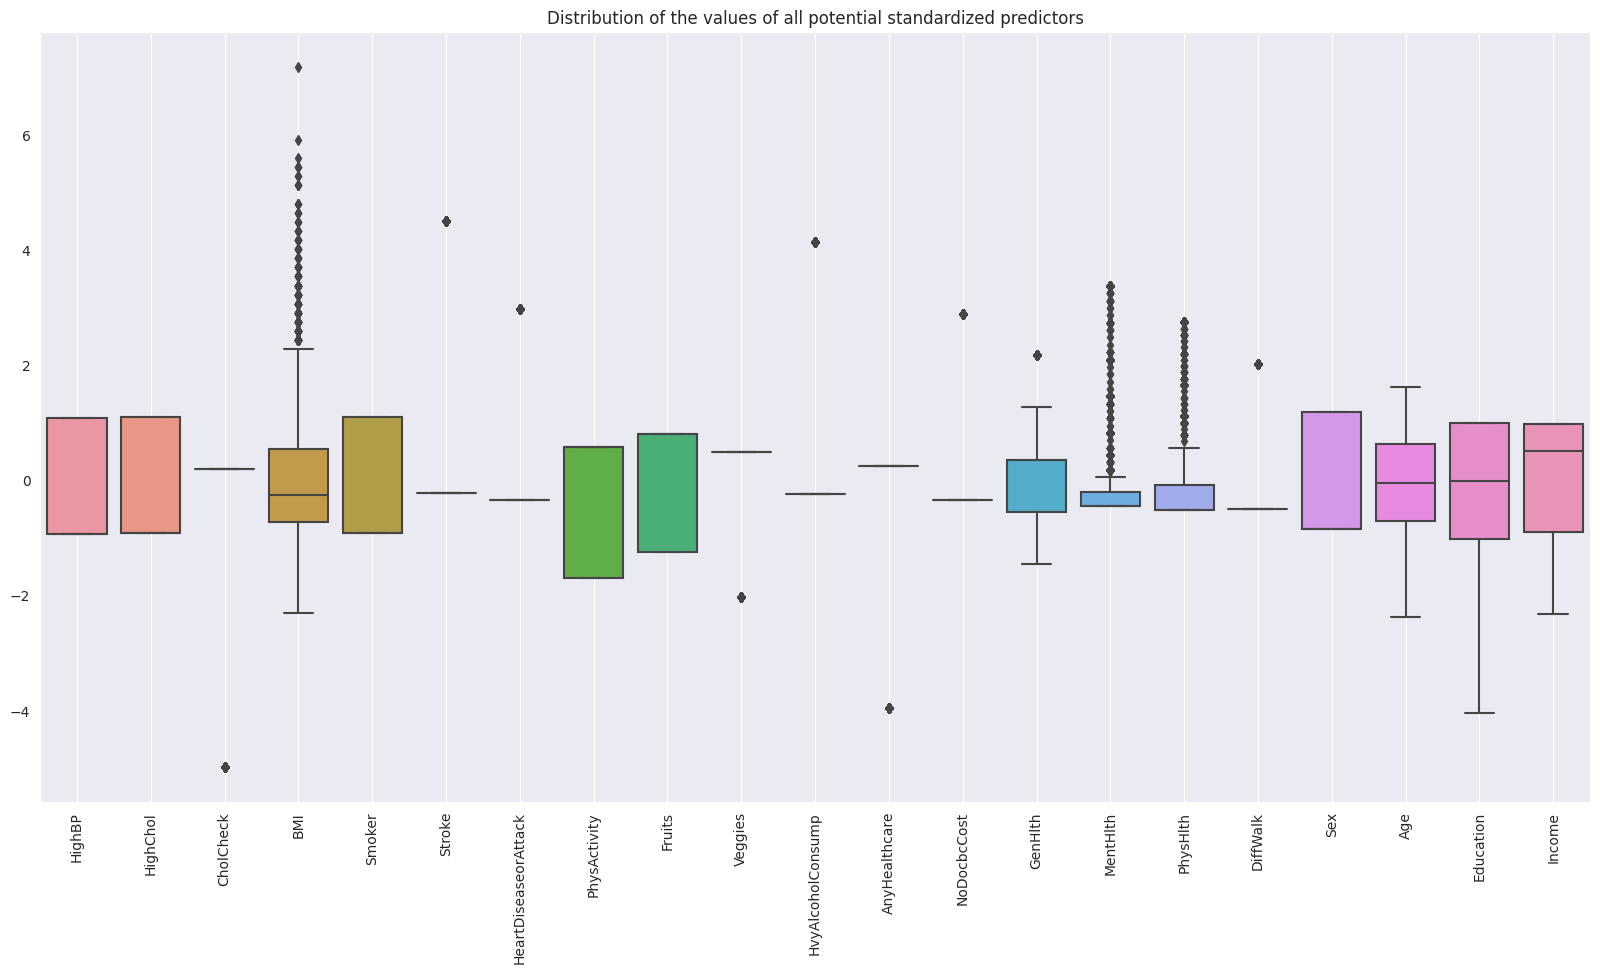

In [51]:
plt.figure(figsize=(20,10))
sea.boxplot(data=std_df.iloc[:,:-1]) # except the target
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

looks better with standardization

###**Correlation**

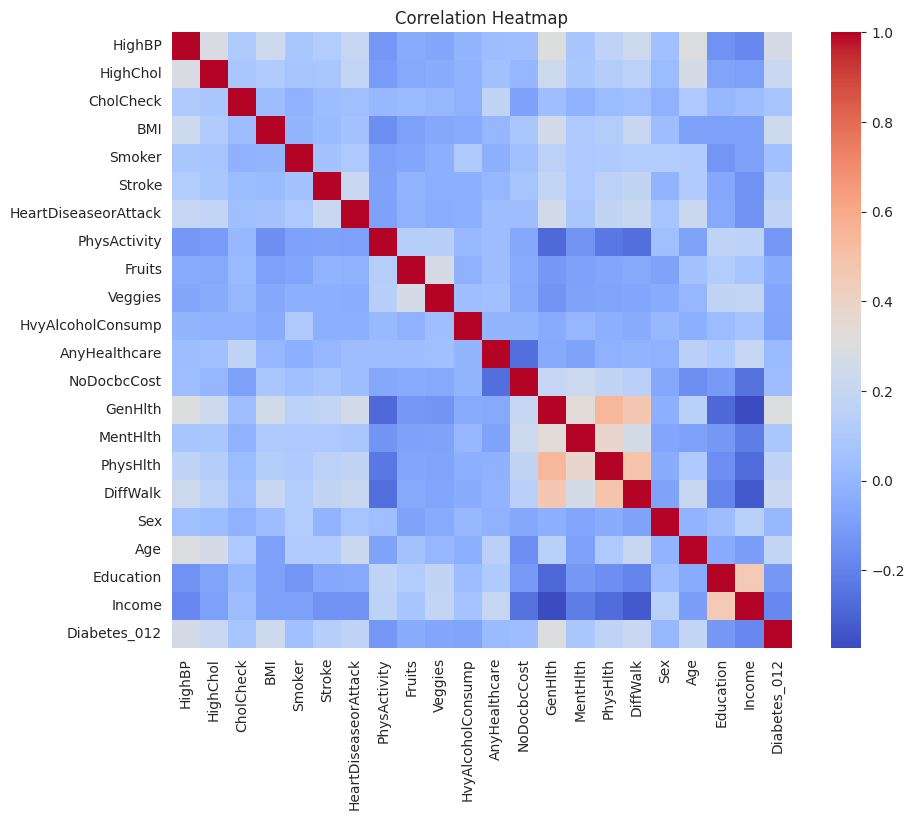

In [52]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### **Dimensionality Reduction**

**Split Dataset**

In [53]:
X = data.drop(["Diabetes_012"], axis=1)
y = data['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
print(X_train.shape)

(8000, 21)


In [55]:
print(X_test.shape)

(2000, 21)


### **Baseline model**

**Define Classifiers**

In [56]:
# Define a list of classifiers
classifiers = {
    # "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    # "K-Nearest Neighbors": KNeighborsClassifier(),
    # "XGBoost": XGBClassifier(),
}

classifiers_pca = {
    # "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    # "K-Nearest Neighbors": KNeighborsClassifier(),
    # "XGBoost": XGBClassifier(),
}

classifiers_lda = {
    # "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    # "K-Nearest Neighbors": KNeighborsClassifier(),
    # "XGBoost": XGBClassifier(),
}

In [57]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Random Forest ---
Accuracy: 0.82
Precision: 0.78
Recall: 0.82
F1 Score: 0.77
ROC AUC: 0.74
Balanced Accuracy: 0.37
Confusion Matrix:
[[1597    0   46]
 [  29    0    7]
 [ 278    0   43]]




- Added the **zero_division=1** parameter to the precision, recall, and F1-score calculations. This parameter handles cases where a class has no predicted samples. It sets the score to 1 in such cases to avoid division by zero errors.

- The if **len(np.unique(y_train)) == 2:** condition checks if the training data contains only two unique classes. If so, it calculates the ROC AUC directly using the binary form.
If there are more than two classes, it calculates the ROC AUC using the one-vs-rest **('ovr')** strategy, which is appropriate for multi-class problems.

### **Principal Component Analysis (PCA)**

*Determining the number of principal components **(n_components)** for Principal Component Analysis (PCA) is an important step in dimensionality reduction. The goal is to find a suitable number of components that capture the majority of the data's variance while reducing its dimensionality.*



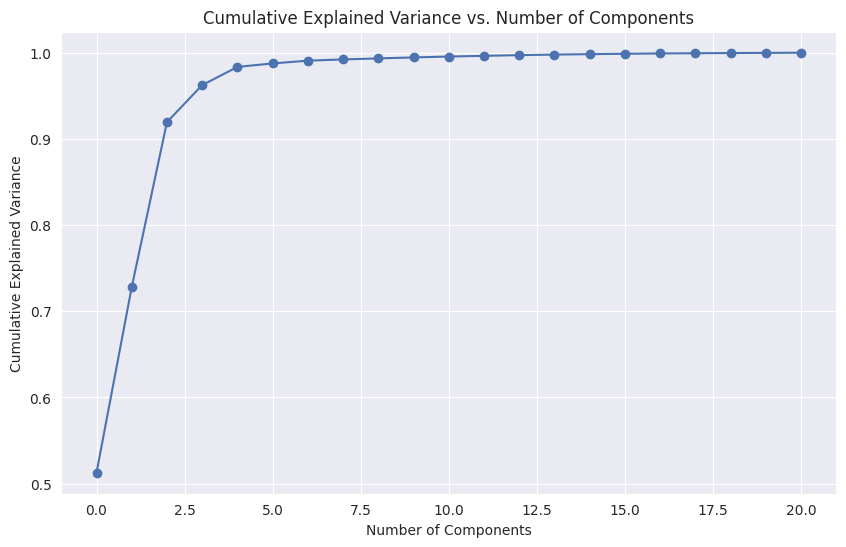

In [58]:
pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

*In the plot, you'll see how much variance is explained by each additional component. You can choose the number of components that retain the desired percentage of total variance. For example, if you want to retain 95% of the variance, find the point on the x-axis where the cumulative explained variance is close to 0.95.*

In [59]:
# base on the graph
best_n_components = 19

In [60]:
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)

# Create a list of column names for the factors DataFrame
column_names = ['PC' + str(i + 1) for i in range(best_n_components)]

# Create the DataFrame
factors_Df = pd.DataFrame(data=X_train_pca, columns=column_names)
factors_Df.index = X_train.index

In [61]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
7644,-6.613671,-0.331982,-2.571832,2.573907,-1.559069,-0.848743,0.237330,0.201867,-0.046748,-0.770200,0.311541,0.548981,0.306942,-0.019969,0.151103,-0.008487,-0.100493,-0.055917,-0.033004
9560,-2.512966,-0.194712,-1.072792,2.191653,0.302312,-0.228086,-1.068011,0.178648,-0.040545,0.809543,-0.468496,0.119859,-0.553595,-0.243450,-0.149155,-0.197292,-0.029024,-0.128388,0.008395
890,-5.594343,-2.478929,-9.692393,-1.499642,1.240741,0.225048,-0.627470,-0.679178,0.198308,-0.350608,0.059538,0.680099,-0.044176,-0.013569,-0.156642,-0.050660,-0.113778,-0.030910,-0.020872
7503,-5.574986,-0.821071,-6.864274,-1.550716,0.083605,-0.210369,0.196333,-0.598196,0.242340,-0.413971,-0.053671,0.639869,-0.006459,0.002710,-0.056198,-0.008631,-0.068081,-0.034583,-0.006756
3484,-7.304743,-1.163882,-7.672462,-1.062912,-2.055491,-0.938664,0.390535,-0.041947,-0.226193,0.106009,0.701479,0.018062,0.237687,-0.057606,0.110773,0.064407,-0.051841,-0.065705,-0.028707


***The lines of code below, Calculate and print various metrics related to the explained variance in a PCA analysis***

- **Line 1:** *The first line prints the explained variance ratio for each principal component. The explained variance ratio indicates the proportion of the total variance in the data that each principal component accounts for. Each value in the printed array represents the percentage of variance explained by the corresponding principal component.*

- **Line 2:** *The second line calculates and prints the cumulative explained variance ratio. It shows the cumulative proportion of the total variance explained by the principal components in increasing order.*

- **Line 3:** *This line prints the sum of all the explained variance ratios. This value should be equal to 1 (or very close to it) since the sum of the explained variance ratios should account for all the variance in the original data.*

*Together, these lines of code provide insights into how much information is retained by each principal component and the cumulative information retained as you consider more components. It helps you decide how many principal components you need to keep to retain a sufficient amount of information while reducing dimensionality. This is essential for determining the appropriate number of components to include in your PCA transformation, which can aid in feature selection, noise reduction, and model efficiency.*

In [62]:
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())
print()
print(pca.explained_variance_ratio_.sum())

[5.14498819e-01 2.15022653e-01 1.88963889e-01 4.36598224e-02
 2.12785813e-02 4.04411020e-03 3.28408781e-03 1.41537462e-03
 1.19632641e-03 1.15853502e-03 1.02008787e-03 8.48718993e-04
 8.00384382e-04 6.36276701e-04 4.99929520e-04 4.26080463e-04
 3.94407379e-04 2.51212973e-04 2.37671871e-04]

[0.51449882 0.72952147 0.91848536 0.96214518 0.98342376 0.98746787
 0.99075196 0.99216734 0.99336366 0.9945222  0.99554229 0.99639101
 0.99719139 0.99782767 0.9983276  0.99875368 0.99914808 0.9993993
 0.99963697]

0.9996369686203366


**Visualization of the explained variance**

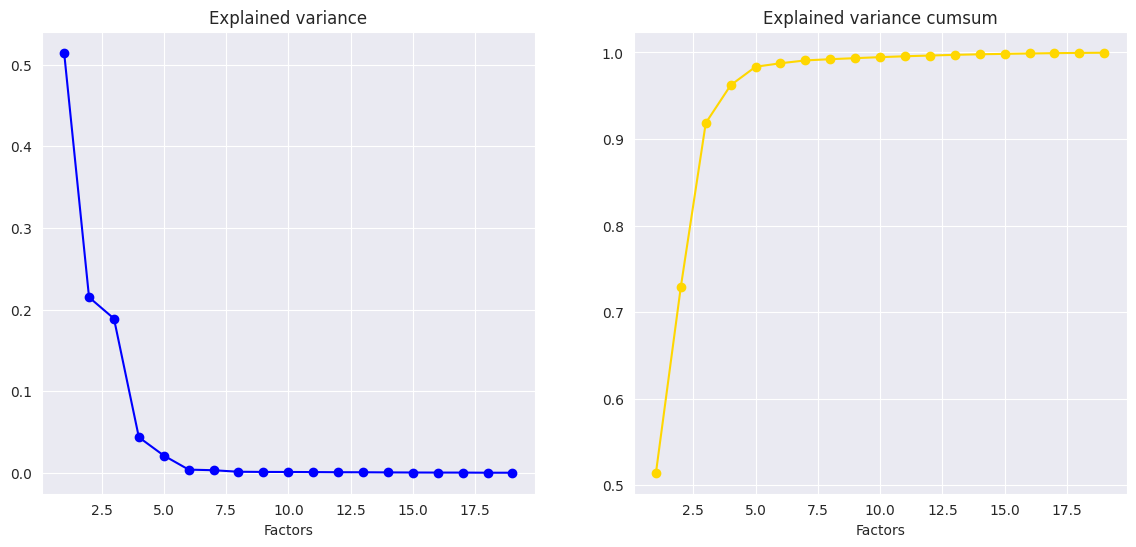

In [63]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,20),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,20),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

**The shared inertia explained by the first 9 components is around 62%**

The statement "The shared inertia explained by the first 9 components is around 62%" indicates that the cumulative variance captured by the first 9 principal components in a Principal Component Analysis (PCA) is approximately 62%.

Whether this is considered good or bad depends on the context of your analysis and the goals you have set. Here's how to interpret it:

1. **Good:**
   - If your goal is dimensionality reduction, and you're looking to retain a significant portion of the original data's variance while reducing the number of features, achieving 62% explained variance with just 9 components could be considered good.
   - If the original dataset is very high-dimensional, retaining 62% of the variability with 9 components might allow for a substantial reduction in complexity without sacrificing too much information.

2. **Not Ideal:**
   - If your analysis or model requires capturing a high percentage of the data's variance, achieving only 62% might not be ideal. In some cases, you might need a higher percentage of variance explained for accurate predictions or meaningful insights.
   - If the original dataset is not too large and you can afford to keep more components, you might aim for a higher explained variance percentage.

3. **Context Matters:**
   - The decision of what is "good" or "bad" depends on the specific problem you're working on. Some applications require very high explained variance, while others can work well with less.

In summary, whether an explained variance of around 62% with the first 9 components is good or bad depends on the trade-offs you're willing to make between dimensionality reduction and retaining the variability needed for your analysis or modeling purposes. It's a balance that needs to be considered within the context of your project's goals and requirements.

### **Linear Discriminant Analysis (LDA)**

For LDA, You can specify the number of components or let it determine automatically

You can use the same number of components for Linear Discriminant Analysis (LDA) as you used for Principal Component Analysis (PCA). In fact, it's a valid approach to directly compare the results and performance of both techniques using the same reduced dimensionality.

When you use the same number of components for both LDA and PCA, you're essentially reducing the data to the same lower-dimensional space. This can allow for a more direct comparison of how each technique impacts the performance of your chosen classifiers. However, it's important to note that LDA and PCA have different underlying principles and goals, so the performance outcomes might vary based on your specific dataset and the nature of your classification problem.

By applying the same number of components, you're ensuring a fair comparison while highlighting the strengths and limitations of both dimensionality reduction techniques.

In [64]:
# Initialize LDA and transform X_train
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)

# Initialize LDA and transform X_test
X_test_lda = lda.transform(X_test)

### **Predictive analysis**

#### **Principal Component Analysis (PCA)**

In [65]:
X_test_pca = pca.transform(X_test)

In [66]:
# Dictionary to store evaluation metrics and predictions
results = {}
pca_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_pca.items():
    # Train the classifier
    clf.fit(X_train_pca, y_train)

    # Store the trained classifiers
    pca_trained_classifiers[name] = clf

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }

# Display the results
print("Principal Component Analysis (PCA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

Principal Component Analysis (PCA) 

--- Random Forest ---
Accuracy: 0.82
Precision: 0.78
Recall: 0.82
F1 Score: 0.77
ROC AUC: 0.73
Balanced Accuracy: 0.36
Confusion Matrix:
[[1610    0   33]
 [  34    0    2]
 [ 287    0   34]]




In [67]:

# Define hyperparameters for each classifier
param_grid = {
    "Random Forest": {
      'n_estimators': [100, 200, 300],  # Number of trees in the forest
      'max_depth': [None, 10, 20, 30],   # Maximum depth of individual trees
      'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
      'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
  }
}

In [68]:
best_params = {}

# Loop through classifiers and perform hyperparameter tuning
for name, clf in classifiers.items():
    if name in param_grid:
        grid_search = GridSearchCV(clf, param_grid[name], cv=5)
        grid_search.fit(X_train, y_train)  # You need to replace X_train and y_train with your data

        best_params[name] = grid_search.best_params_

# Print the best parameters for each classifier
for name, params in best_params.items():
    print(f"Best parameters for {name}: {params}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [69]:
# Dictionary to store evaluation metrics and predictions
results = {}
pca_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_pca.items():
    best_param = best_params.get(name)  # Retrieve the best parameters

    if best_param:
      # Initialize the classifier with the best parameters
      clf = clf.set_params(**best_param)

      # Train the classifier
      clf.fit(X_train_pca, y_train)

      # Store the trained classifiers
      pca_trained_classifiers[name] = clf

      # Make predictions on the test set
      y_pred = clf.predict(X_test_pca)

      # Calculate evaluation metrics
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
      recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
      f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
      balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
      confusion = confusion_matrix(y_test, y_pred)

      # ROC AUC calculation for binary and multiclass classification
      if len(np.unique(y_train)) == 2:
          roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])
      else:
          roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')

      # Store the results in the dictionary
      results[name] = {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1,
          "ROC AUC": roc_auc,
          "Balanced Accuracy": balanced_accuracy,
          "Confusion Matrix": confusion,
      }

# Display the results
print("Principal Component Analysis (PCA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

Principal Component Analysis (PCA) 

--- Random Forest ---
Accuracy: 0.82
Precision: 0.78
Recall: 0.82
F1 Score: 0.75
ROC AUC: 0.77
Balanced Accuracy: 0.35
Confusion Matrix:
[[1634    0    9]
 [  34    0    2]
 [ 308    0   13]]




#### **Linear Discriminant Analysis (LDA)**

In [70]:
# Initialize LDA and transform X_test
X_test_lda = lda.transform(X_test)

In [ ]:
# Dictionary to store evaluation metrics and predictions
results = {}
lda_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_lda.items():
    # Train the classifier
    clf.fit(X_train_lda, y_train)

    # Store the trained classifiers
    lda_trained_classifiers[name] = clf

    # Make predictions on the test set
    y_pred = clf.predict(X_test_lda)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }


# Display the results
print("Linear Discriminant Analysis (LDA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

Linear Discriminant Analysis (LDA) 

--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.81
ROC AUC: 0.78
Balanced Accuracy: 0.39
Confusion Matrix:
[[41698     0  1097]
 [  865     0    79]
 [ 5692     0  1305]]


--- Random Forest ---
Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
ROC AUC: 0.70
Balanced Accuracy: 0.39
Confusion Matrix:
[[40376    71  2348]
 [  790     2   152]
 [ 5397    35  1565]]


--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
ROC AUC: 0.65
Balanced Accuracy: 0.39
Confusion Matrix:
[[40662    24  2109]
 [  811     1   132]
 [ 5516    18  1463]]


--- XGBoost ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.80
ROC AUC: 0.78
Balanced Accuracy: 0.37
Confusion Matrix:
[[42032     0   763]
 [  885     0    59]
 [ 6033     0   964]]




### **Ensemble of Classifiers with Dimensionality Reduction**

Combining PCA and LDA with different numbers of components in an ensemble can indeed be challenging due to the mismatch in dimensions. To create a meaningful ensemble, it's best to ensure that the dimensions of the features being used for each classifier are consistent.

Given this consideration, you have a few options:

1. **Choose One Dimensionality Reduction Technique**: If you want to use an ensemble of classifiers, you should decide whether to use PCA or LDA. You could experiment with both techniques separately to see which one performs better for your specific problem. Once you've made a decision, apply the chosen technique consistently across all classifiers within the ensemble.

2. **Dimensionality Reduction as a Hyperparameter**: Alternatively, you could treat the choice of dimensionality reduction as a hyperparameter. For each base classifier in the ensemble, you could experiment with different numbers of components for PCA or LDA and then select the best-performing configuration based on cross-validation or other validation methods.

3. **Stacking of Ensembles**: If you want to leverage both PCA and LDA, you could consider creating separate ensembles using each dimensionality reduction technique. Then, you could create a higher-level ensemble that combines the predictions of the two separate ensembles. This approach can be complex but allows you to benefit from the strengths of both techniques.

Regardless of the approach you choose, it's important to maintain consistency in the dimensionality reduction technique and the number of components used across all classifiers within an ensemble. Your thoughtful approach to addressing this issue demonstrates your commitment to achieving robust and insightful results in your programming and academic pursuits.

#### **1. Choose One Dimensionality Reduction Technique**

##### **2.1 PCA**

###### **Bagging**

In [ ]:
# Create a list of base classifiers
base_classifiers = [pca_trained_classifiers['Logistic Regression'], pca_trained_classifiers['Random Forest'], pca_trained_classifiers['K-Nearest Neighbors'] , pca_trained_classifiers['XGBoost'] ]

In [ ]:
# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 3  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble.
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train_pca, y_train)

In [ ]:
# Predict using the ensemble classifier
begging_pred  = bagging_model.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, begging_pred )
precision = precision_score(y_test, begging_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, begging_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, begging_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, begging_pred )
confusion = confusion_matrix(y_test, begging_pred )

# ROC AUC calculation for binary and multiclass classification
# if len(np.unique(y_train)) == 2:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])
# else:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')


print(f"--- LDA Bagging Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# print("ROC AUC: {:.2f}".format(roc_auc))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Bagging Ensemble with Dimensionality Reduction ---
Accuracy: 0.85
Precision: 0.83
Recall: 0.85
F1 Score: 0.81
Balanced Accuracy: 0.39
Confusion Matrix:
[[41789     0  1006]
 [  850     0    94]
 [ 5615     0  1382]]




###### **Boosting**

In [ ]:
base_classifiers = [pca_trained_classifiers['Logistic Regression'], pca_trained_classifiers['Random Forest'], pca_trained_classifiers['XGBoost'] ]

In [ ]:
# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
for boosting_model in boosting_classifiers:
    boosting_model.fit(X_train_pca, y_train)

In [ ]:
# Predict using the ensemble classifier
boosting_pred  = boosting_model.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred )
precision = precision_score(y_test, boosting_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, boosting_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, boosting_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, boosting_pred )
confusion = confusion_matrix(y_test, boosting_pred )

# ROC AUC calculation for binary and multiclass classification
# if len(np.unique(y_train)) == 2:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])
# else:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')


print(f"--- LDA Boosting Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# print("ROC AUC: {:.2f}".format(roc_auc))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Boosting Ensemble with Dimensionality Reduction ---
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 Score: 0.77
Balanced Accuracy: 0.33
Confusion Matrix:
[[42795     0     0]
 [  944     0     0]
 [ 6997     0     0]]




##### **2.2 LDA**

In [ ]:
# Create a list of base classifiers
base_classifiers = [lda_trained_classifiers['Logistic Regression'], lda_trained_classifiers['Random Forest'], lda_trained_classifiers['K-Nearest Neighbors'] , lda_trained_classifiers['XGBoost'] ]

###### **Bagging**

In [ ]:
# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 4  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train_lda, y_train)

In [ ]:
# Predict using the ensemble classifier
begging_pred  = bagging_model.predict(X_test_lda)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, begging_pred )
precision = precision_score(y_test, begging_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, begging_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, begging_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, begging_pred )
confusion = confusion_matrix(y_test, begging_pred )

# ROC AUC calculation for binary and multiclass classification
# if len(np.unique(y_train)) == 2:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda)[:, 1])
# else:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda), multi_class='ovr')


print(f"--- LDA Bagging Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# print("ROC AUC: {:.2f}".format(roc_auc))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Bagging Ensemble with Dimensionality Reduction ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.80
Balanced Accuracy: 0.37
Confusion Matrix:
[[42049     0   746]
 [  892     0    52]
 [ 6035     0   962]]




###### **Boosting**

In [ ]:
base_classifiers = [lda_trained_classifiers['Logistic Regression'], lda_trained_classifiers['Random Forest'], lda_trained_classifiers['XGBoost'] ]

In [ ]:
# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
for boosting_model in boosting_classifiers:
    boosting_model.fit(X_train_lda, y_train)

In [ ]:
# Predict using the ensemble classifier
boosting_pred  = boosting_model.predict(X_test_lda)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred )
precision = precision_score(y_test, boosting_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, boosting_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, boosting_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, boosting_pred )
confusion = confusion_matrix(y_test, boosting_pred )

# ROC AUC calculation for binary and multiclass classification
# if len(np.unique(y_train)) == 2:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda)[:, 1])
# else:
#     roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda), multi_class='ovr')


print(f"--- LDA Boosting Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# print("ROC AUC: {:.2f}".format(roc_auc))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Boosting Ensemble with Dimensionality Reduction ---
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 Score: 0.77
Balanced Accuracy: 0.33
Confusion Matrix:
[[42795     0     0]
 [  944     0     0]
 [ 6997     0     0]]


